# Optional Lab: Feature Engineering and Polynomial Regression

![](./images/C1_W2_Lab07_FeatureEngLecture.PNG)


## Goals
In this lab you will:
- explore feature engineering and polynomial regression which allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.


## Tools
You will utilize the function developed in previous labs as well as matplotlib and NumPy. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

<a name='FeatureEng'></a>
# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


<a name='PolynomialFeatures'></a>
## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

Iteration         0, Cost: 1.40339e+04
Iteration      1000, Cost: 1.98481e+03
Iteration      2000, Cost: 9.79791e+02
Iteration      3000, Cost: 8.93946e+02
Iteration      4000, Cost: 8.84612e+02
Iteration      5000, Cost: 8.81658e+02
Iteration      6000, Cost: 8.79247e+02
Iteration      7000, Cost: 8.76892e+02
Iteration      8000, Cost: 8.74553e+02
Iteration      9000, Cost: 8.72228e+02
w,b found by gradient descent: w: [14.64], b: -0.4156


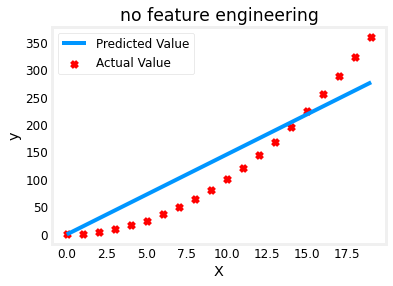

In [33]:
# create target data
x = np.arange(0, 20, 1)
y = x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

In [37]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2 -200     #<-- added engineered feature

Iteration         0, Cost: 1.40884e+04
Iteration      1000, Cost: 1.37001e+04
Iteration      2000, Cost: 1.35130e+04
Iteration      3000, Cost: 1.33284e+04
Iteration      4000, Cost: 1.31464e+04
Iteration      5000, Cost: 1.29669e+04
Iteration      6000, Cost: 1.27898e+04
Iteration      7000, Cost: 1.26151e+04
Iteration      8000, Cost: 1.24428e+04
Iteration      9000, Cost: 1.22728e+04
w,b found by gradient descent: w: [0.23], b: 13.3555


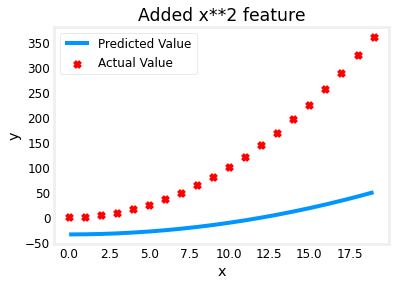

In [38]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Great! near perfect fit. Notice the values of $\mathbf{w}$ and b printed right above the graph: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w},b $ to be (1.0,0.049) or a model of $y=1*x_0^2+0.049$, very close to our target of $y=1*x_0^2+1$. If you ran it longer, it could be a better match. 

### Selecting Features
<a name='GDF'></a>
Above, we knew that an $x^2$ term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

Run the next cells. 

In [39]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration         0, Cost: 1.14029e+03
Iteration        10, Cost: 3.84276e+02
Iteration        20, Cost: 3.83668e+02
Iteration        30, Cost: 3.83061e+02
Iteration        40, Cost: 3.82455e+02
Iteration        50, Cost: 3.81850e+02
Iteration        60, Cost: 3.81246e+02
Iteration        70, Cost: 3.80643e+02
Iteration        80, Cost: 3.80041e+02
Iteration        90, Cost: 3.79440e+02
w,b found by gradient descent: w: [0.   0.01 0.06], b: 0.0002


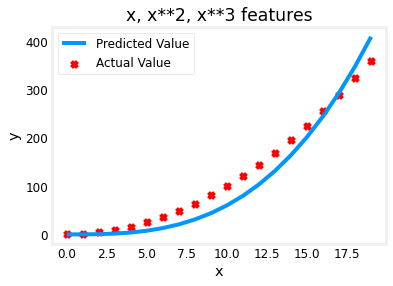

In [43]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=100, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Note the value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms. 
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

### An Alternate View
Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example. 

In [44]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

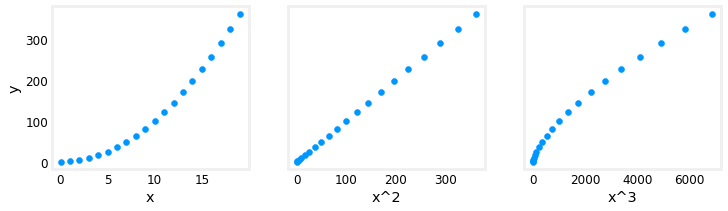

In [45]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Above, it is clear that the $x^2$ feature mapped against the target value $y$ is linear. Linear regression can then easily generate a model using that feature.

### Scaling features
As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [51]:
# create target data
x = np.arange(0,20,1)
print(x)
X = np.c_[x, x**2, x**3]
print(X)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


Now we can try again with a more aggressive value of alpha:

Iteration         0, Cost: 1.35463e+04
Iteration       100, Cost: 1.02893e+03
Iteration       200, Cost: 1.44280e+02
Iteration       300, Cost: 2.72716e+01
Iteration       400, Cost: 1.10578e+01
Iteration       500, Cost: 8.42967e+00
Iteration       600, Cost: 7.69457e+00
Iteration       700, Cost: 7.27399e+00
Iteration       800, Cost: 6.94644e+00
Iteration       900, Cost: 6.67390e+00
w,b found by gradient descent: w: [32.13 40.67 42.26], b: 123.4947


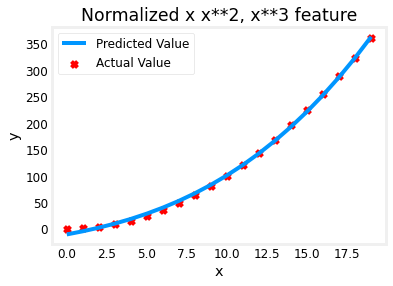

In [60]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized. Gradient descent has all but eliminated the $x^3$ term.

### Complex Functions
With feature engineering, even quite complex functions can be modeled:

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


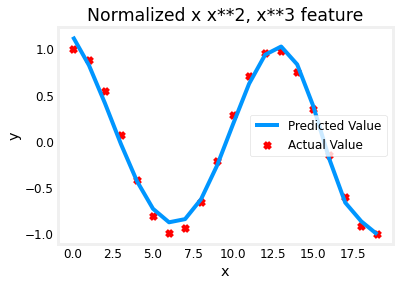

In [74]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()



## Congratulations!
In this lab you:
- learned how linear regression can model complex, even highly non-linear functions using feature engineering
- recognized that it is important to apply feature scaling when doing feature engineering

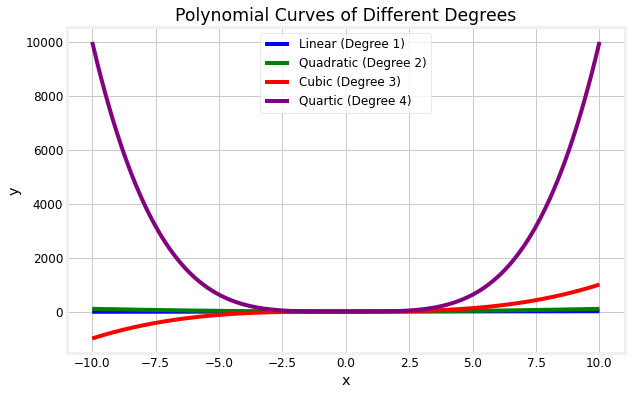

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for different polynomial degrees
y_linear = x
y_quad = x**2
y_cubic = x**3
y_quartic = x**4

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each curve
plt.plot(x, y_linear, label="Linear (Degree 1)", color='b')
plt.plot(x, y_quad, label="Quadratic (Degree 2)", color='g')
plt.plot(x, y_cubic, label="Cubic (Degree 3)", color='r')
plt.plot(x, y_quartic, label="Quartic (Degree 4)", color='purple')

# Add title and labels
plt.title("Polynomial Curves of Different Degrees")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


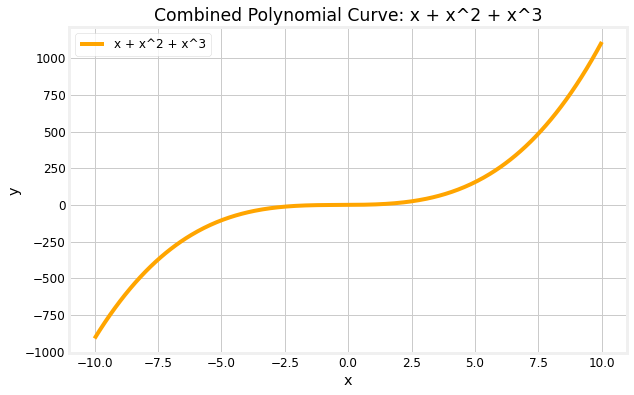

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for the combination of different degrees
y_combined = x + x**2 + x**3

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the combined curve
plt.plot(x, y_combined, label="x + x^2 + x^3", color='orange')

# Add title and labels
plt.title("Combined Polynomial Curve: x + x^2 + x^3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


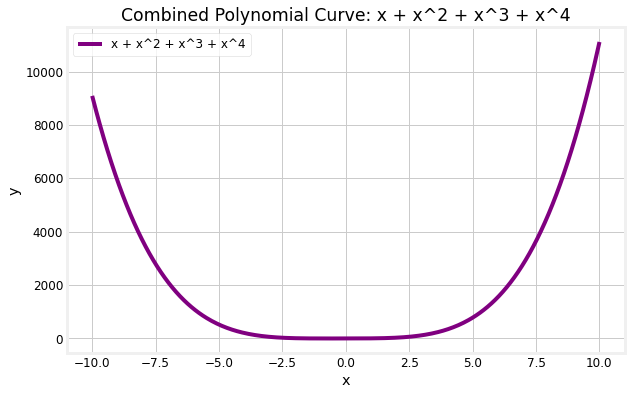

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for the combination of all 4 degrees (x, x^2, x^3, x^4)
y_more = x + x**2 + x**3 + x**4

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the combined curve (linear + quadratic + cubic + quartic)
plt.plot(x, y_more, label="x + x^2 + x^3 + x^4", color='purple')

# Add title and labels
plt.title("Combined Polynomial Curve: x + x^2 + x^3 + x^4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


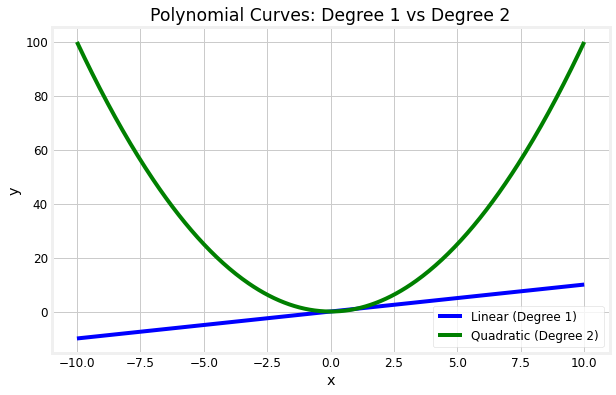

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for degree 1 (linear) and degree 2 (quadratic)
y_linear = x
y_quadratic = x**2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the linear curve (Degree 1)
plt.plot(x, y_linear, label="Linear (Degree 1)", color='blue')

# Plot the quadratic curve (Degree 2)
plt.plot(x, y_quadratic, label="Quadratic (Degree 2)", color='green')

# Add title and labels
plt.title("Polynomial Curves: Degree 1 vs Degree 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


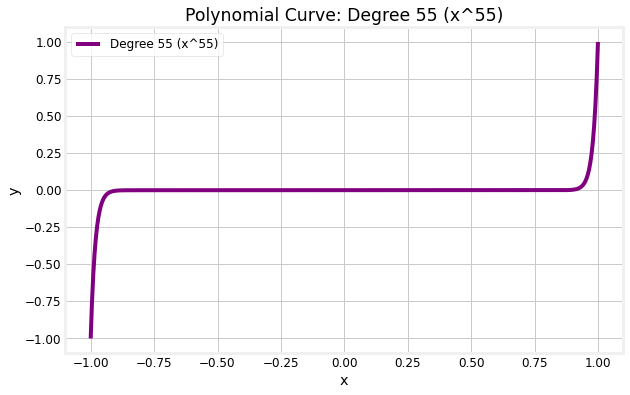

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values, limiting the range to avoid very large numbers for x^55
x = np.linspace(-1, 1, 400)  # Limiting x between -1 and 1

# Calculate y values for degree 55 (x^55)
y_degree_55 = x**55

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the curve for degree 55
plt.plot(x, y_degree_55, label="Degree 55 (x^55)", color='purple')

# Add title and labels
plt.title("Polynomial Curve: Degree 55 (x^55)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


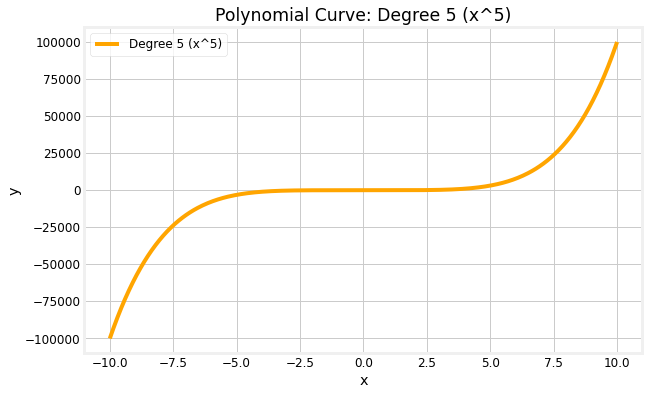

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for degree 5 (x^5)
y_degree_5 = x**5

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the curve for degree 5
plt.plot(x, y_degree_5, label="Degree 5 (x^5)", color='orange')

# Add title and labels
plt.title("Polynomial Curve: Degree 5 (x^5)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


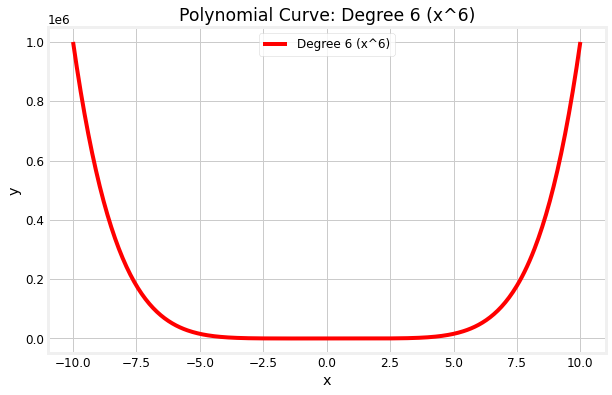

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values for degree 6 (x^6)
y_degree_6 = x**6

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the curve for degree 6
plt.plot(x, y_degree_6, label="Degree 6 (x^6)", color='red')

# Add title and labels
plt.title("Polynomial Curve: Degree 6 (x^6)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


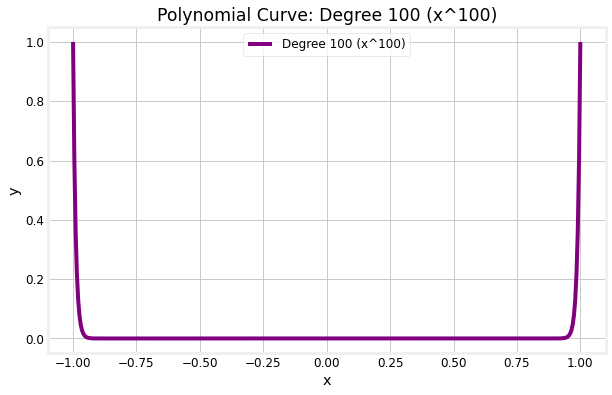

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values (limit to [-1, 1] to avoid extreme values for large exponents)
x = np.linspace(-1, 1, 400)

# Calculate y values for degree 100 (x^100)
y_degree_100 = x**100

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the curve for degree 100
plt.plot(x, y_degree_100, label="Degree 100 (x^100)", color='purple')

# Add title and labels
plt.title("Polynomial Curve: Degree 100 (x^100)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
